# Projeto 1 Super Comp
O projeto consiste em uma implementação de um algoritmo de atribuição de alunos a projetos no Projeto Final de Engenharia, onde:

 - Cada aluno ordena algumas opções de projetos de acordo com sua preferência do menos ao mais preferível, de modo que seu projeto favorito terá o maior índice.
 - A satisfação para uma combinação de alunos e projetos é calculada a partir da soma dos indices respectivos ao quadrado para os projetos em que cada aluno foi alocado.
 - Cada projeto receberá exatamente n alunos.

O objetivo é encontrar a solução que deixe a satisfação global maior, uma vez que os alunos ficam mais felizes quando são colocados em projetos que preferem mais. Como não é possível dizer se uma solução encontrada é , necessáriamente a melhor possível, é preciso encontrar todas as soluções existentes de maneira iterativa.

Para uniformizar os programas foi definida uma estrutura para as entradas

- __n_alunos:__  Número de alunos que serão alocados.
- __n_proj:__    Número de projetos que estão disponíveis.
- __n_escolhas:__    Em quantos projetos o aluno pode se candidatar.

 
## Parte 1 algoritmos
A intensão da primeira parte é comparar a feita implementação em Python com traduzida para C++. Os testes foram feitos em um Dell XPS 15 9570 com Ubuntu 19.     

__As funções são:__

- __escolhe_alunos:__  Entra em uma recurcao ate achar todas as possibilidades até achar a melhor.
- __main:__     Recebe entradas, separa os dados e cria vetores com eles e os manda para o __escolhe_alunos__

O código fonte é o arquivo __P1/solucao-ingenua.cpp__, que foi traduzido do __P1/backtrack.py__. O executável estão localizadas dentro da pasta P1/build.

As entradas utilizadas para fazer a comparação têm as seguintes características:

| n_alunos | n_proj | n_escolhas |
|:--------:|:------:|:----------:|
|     6    |    2   |      2     |
|     9    |    3   |      3     |
|    12    |    4   |      3     |

O tempo de execução, em microsegundos, das versões em ambas as linguagens é contado para cada uma das entradas, usando a biblioteca time no caso do Python e a chronos no C++.


<span style="color:red">**Caso queira recompilar os programas e rodar este notebook, comentar e/ou descomentar os trechos de código indicados dentro de cada arquivo .cpp e .cu rodar a célua abaixo:**</span>

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

try:
    os.system('mkdir build')
    os.system('mkdir output')
except:
    os.system('')

os.system('cmake -B ./build')
os.system('make -C ./build')


### Compilando e Executando os programas

In [10]:
os.system('python3 backtrack.py < ./entrada  > ./output/saida0p.txt')
os.system('python3 backtrack.py < ./entrada1 > ./output/saida1p.txt')
os.system('python3 backtrack.py < ./entrada2 > ./output/saida2p.txt')

os.system('./build/busca_exaustiva_seq < ./entrada  > ./output/saida0c.txt')
os.system('./build/busca_exaustiva_seq < ./entrada1 > ./output/saida1c.txt')
os.system('./build/busca_exaustiva_seq < ./entrada2 > ./output/saida2c.txt')

0

### Python e C++

In [11]:
with open('./output/saida1c.txt', 'r') as f:
    lines = f.read().splitlines()
    s0c = lines[-1]
with open('./output/saida0c.txt', 'r') as f:
    lines = f.read().splitlines()
    s1c = lines[-1]
with open('./output/saida2c.txt', 'r') as f:
    lines = f.read().splitlines()
    s2c = lines[-1]

with open('./output/saida1p.txt', 'r') as f:
    lines = f.read().splitlines()
    s0p = lines[-1]
with open('./output/saida0p.txt', 'r') as f:
    lines = f.read().splitlines()
    s1p = lines[-1]
with open('./output/saida2p.txt', 'r') as f:
    lines = f.read().splitlines()
    s2p = lines[-1]

lc = [s0c,s1c,s2c]
lp = [s0p,s1p,s2p]
entrada = ["0","1","2"]

df = pd.DataFrame(list(zip(lc, lp,entrada)), 
               columns =['C++', 'Python', 'entrada'])
df["Python"] = pd.to_numeric(df["Python"])
df["C++"] = pd.to_numeric(df["C++"])
df

,C++,Python,entrada
0,25,543,0
1,155,40981,1
2,28077,897490,2


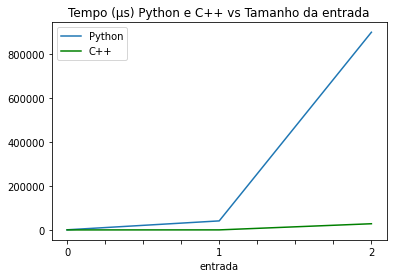

In [12]:
ax = plt.gca()
df.plot(kind='line',x='entrada',y='Python',ax=ax)
df.plot(kind='line',x='entrada',y='C++', color='green', ax=ax)
plt.title(u"Tempo (µs) Python e C++ vs Tamanho da entrada")
plt.show()

### Conclusões Python e C++
Como é possível perceber, o algoritmo faz os cálculos muito mais rápido na implementação em C++, isso se dá pois a linguagem Python é interpretada e não compilada, dessa forma, como o código interpretado é sempre mais lento que o código de máquina, pois são necessárias muito mais instruções para implementar uma instrução interpretada do que para implementar uma instrução real de máquina e não tem um impacto muito grande de otimizações, isso gera uma repercussão muito grande na performance do código, contudo, Python é uma ótima linguagem para desenvolvimento, uma vez que o código original é muito mais legível e tem cerca de metade do número de linhas de sua versão traduzida para C++. A difereça é mais aparente quando o __n_escolhas__ aumenta.

## Parte 2 Paralelismo

A segunda parte consiste em usar técnicas para deixar o código mais rápido. A primeira parte foi paralelizar a busca exaustiva (__solucao-ingenua.cpp__), a segunda foi fazer a busca local e branch and bound e, em seguida, paralelizá-las .

- __Busca Exaustiva Paralela:__ Paraleliza as recursões colocando cada uma em uma task diferente
- __Busca Local Sequencial:__   Encontra a melhor solução de forma iterativa. A partir de uma solução inicial aleatória. Em seguida é verificado se a troca de projetos com outro aluno aumentará a satisfação ou não, caso positivo, esse processo é realizado novamente. Isso e feito cerca de 80000 vezes para garantir que o melhor resultado encontrado é o melhore resultado global. 
- __Busca Local Paralela:__     Pareleliza o loop de forma que cada iterção roda um uma thread, adicionando os resultados a um vetor para guardar a melhor possibilidade encontrada.
- __Branch and Bound Sequencial:__ É semelhante ao busca exaustiva, porém, durante o processamento, se soubermos que as trocas restantes possíveis não resultarão em uma satifação maior que a melhor global, o processamento dessa combinação será parado.
- __Branch and Bound Paralelo:__ Igual ao Branch and Bound porém usando a mesma técnica de paralelização da busca exaustiva.

Para a busca exaustiva sequencial código fonte é o arquivo __P1/solucao-ingenua.cpp__ gerando o executável __P1/build/busca_exaustiva_seq__ e sua versão paralelizada __P1/busca_exaustiva.cpp__ com seu respectivo executável __P1/build/busca_exaustiva_par__, para o branch and bound o código fonte é __P1/branch_bound.cpp__ e o executável é  __P1/build/branch_bound_seq__.

Para a busca local sequencial código fonte é o arquivo __P1/busca_local.cpp__ gerando o executável __P1/build/busca_local_seq__ e sua versão paralelizada __P1/busca_local_paralel.cpp__ com seu respectivo executável __P1/build/busca_local_par__,para o branch and bound o código fonte é __P1/branch_bound_par.cpp__ e o executável é  __P1/build/branch_bound_par__.

Os executáveis foram compilados com a flag __-O3__ de otimização e os que tiverem paralisação foram compilados com a biblioteca OpenMP.

Os testes foram feitos em um Dell XPS 15 9570 que possui 12 threads rondando Ubuntu 19.     

Foram usados arquivos de entrada com os seguintes parâmetros:

| n_alunos | n_proj | n_escolhas |
|:--------:|:------:|:----------:|
|     6    |    2   |      2     |
|     9    |    3   |      3     |
|    12    |    4   |      3     |
|    15    |    5   |      3     |

O tempo de execução, em microsegundos, é contado para cada uma das entradas, usando a biblioteca chronos.

### Compilando e Executando os programas

In [23]:
try:
    os.system('mkdir build')
    os.system('mkdir output')
except:
    os.system('')

os.system('cmake -B ./build')
os.system('make -C ./build')

os.system('./build/busca_exaustiva_seq < ./entrada  > ./output/saida0c.txt')
os.system('./build/busca_exaustiva_seq < ./entrada1 > ./output/saida1c.txt')
os.system('./build/busca_exaustiva_seq < ./entrada2 > ./output/saida2c.txt')
os.system('./build/busca_exaustiva_seq < ./entrada3 > ./output/saida3c.txt')

os.system('./build/busca_exaustiva_par < ./entrada  > ./output/saida0cp.txt')
os.system('./build/busca_exaustiva_par < ./entrada1 > ./output/saida1cp.txt')
os.system('./build/busca_exaustiva_par < ./entrada2 > ./output/saida2cp.txt')
os.system('./build/busca_exaustiva_par < ./entrada3 > ./output/saida3cp.txt')

os.system('./build/busca_local_seq < ./entrada  > ./output/saida0l.txt')
os.system('./build/busca_local_seq < ./entrada1 > ./output/saida1l.txt')
os.system('./build/busca_local_seq < ./entrada2 > ./output/saida2l.txt')
os.system('./build/busca_local_seq < ./entrada3 > ./output/saida3l.txt')

os.system('./build/busca_local_par < ./entrada  > ./output/saida0lp.txt')
os.system('./build/busca_local_par < ./entrada1 > ./output/saida1lp.txt')
os.system('./build/busca_local_par < ./entrada2 > ./output/saida2lp.txt')
os.system('./build/busca_local_par < ./entrada3 > ./output/saida3lp.txt')

os.system('./build/branch_bound_seq < ./entrada  > ./output/saida0lb.txt')
os.system('./build/branch_bound_seq < ./entrada1 > ./output/saida1lb.txt')
os.system('./build/branch_bound_seq < ./entrada2 > ./output/saida2lb.txt')
os.system('./build/branch_bound_seq < ./entrada3 > ./output/saida3lb.txt')

os.system('./build/branch_bound_par < ./entrada  > ./output/saida0lpb.txt')
os.system('./build/branch_bound_par < ./entrada1 > ./output/saida1lpb.txt')
os.system('./build/branch_bound_par < ./entrada2 > ./output/saida2lpb.txt')
os.system('./build/branch_bound_par < ./entrada3 > ./output/saida3lpb.txt')

0

### Busca Exaustiva Sequencial e Paralela

In [18]:
with open('./output/saida1c.txt', 'r') as f:
    lines = f.read().splitlines()
    s0c = lines[-1]
with open('./output/saida0c.txt', 'r') as f:
    lines = f.read().splitlines()
    s1c = lines[-1]
with open('./output/saida2c.txt', 'r') as f:
    lines = f.read().splitlines()
    s2c = lines[-1]
with open('./output/saida3c.txt', 'r') as f:
    lines = f.read().splitlines()
    s3c = lines[-1]

with open('./output/saida1cp.txt', 'r') as f:
    lines = f.read().splitlines()
    s0p = lines[-1]
with open('./output/saida0cp.txt', 'r') as f:
    lines = f.read().splitlines()
    s1p = lines[-1]
with open('./output/saida2cp.txt', 'r') as f:
    lines = f.read().splitlines()
    s2p = lines[-1]
with open('./output/saida3cp.txt', 'r') as f:
    lines = f.read().splitlines()
    s3p = lines[-1]
    
lce = [s0c,s1c,s2c,s3c]
lpe = [s0p,s1p,s2p,s3p]
entrada = ["0","1","2","3"]

df = pd.DataFrame(list(zip(lce, lpe,entrada)), 
               columns =['Sequencial', 'Paralelo', 'entrada'])
df["Paralelo"] = pd.to_numeric(df["Paralelo"])
df["Sequencial"] = pd.to_numeric(df["Sequencial"])
df

,Sequencial,Paralelo,entrada
0,26,2708,0
1,162,2671,1
2,28008,11204,2
3,12454394,3743740,3


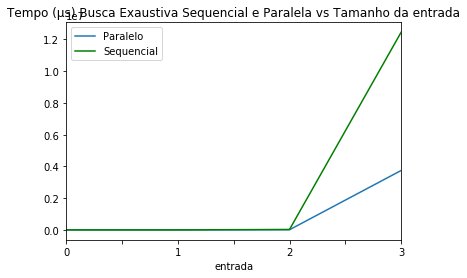

In [19]:
ax = plt.gca()
df.plot(kind='line',x='entrada',y='Paralelo',ax=ax)
df.plot(kind='line',x='entrada',y='Sequencial', color='green', ax=ax)
plt.title(u"Tempo (µs) Busca Exaustiva Sequencial e Paralela vs Tamanho da entrada")
plt.show()

### Conclusões: Busca Exaustiva 
O gráfico e tabela acima deixam muito aparente o quanto a paralisação deixa o programa mais rápido com entradas maiores, onde a versão paralelizada teve um tempo de execução de aproximadamente 10% da versão original. Isso ocorre pois cada task criada pode rodar de forma paralela âs outras, e quanto mais threads o processador tiver, mais tasks podem ser executadas em paralelo. Assim apesar de o tempo de ambas as versões crescer de forma exponencial, o tempo da sequencial cresce muito mais conforme o tamanho da entrada. Contudo, como o custo de criação de tasks é muito grande, se forem criadas muitas delas o desempenho do programa pode sofrer consideravelmente, assim o tempo, para entradas muito pequenas, é maior no paralelo do que no sequencial

### Busca Local Sequencial e Paralela

In [20]:
with open('./output/saida1l.txt', 'r') as f:
    lines = f.read().splitlines()
    s0c = lines[-1]
with open('./output/saida0l.txt', 'r') as f:
    lines = f.read().splitlines()
    s1c = lines[-1]
with open('./output/saida2l.txt', 'r') as f:
    lines = f.read().splitlines()
    s2c = lines[-1]
with open('./output/saida3l.txt', 'r') as f:
    lines = f.read().splitlines()
    s3c = lines[-1]

with open('./output/saida1lp.txt', 'r') as f:
    lines = f.read().splitlines()
    s0p = lines[-1]
with open('./output/saida0lp.txt', 'r') as f:
    lines = f.read().splitlines()
    s1p = lines[-1]
with open('./output/saida2lp.txt', 'r') as f:
    lines = f.read().splitlines()
    s2p = lines[-1]
with open('./output/saida3lp.txt', 'r') as f:
    lines = f.read().splitlines()
    s3p = lines[-1]
    
lcl = [s0c,s1c,s2c,s3c]
lpl = [s0p,s1p,s2p,s3p]
entrada = ["0","1","2","3"]

df = pd.DataFrame(list(zip(lcl, lpl,entrada)), 
               columns =['Sequencial', 'Paralelo', 'entrada'])
df["Paralelo"] = pd.to_numeric(df["Paralelo"])
df["Sequencial"] = pd.to_numeric(df["Sequencial"])
df

,Sequencial,Paralelo,entrada
0,69701,44189,0
1,188168,64528,1
2,446154,121977,2
3,832685,208495,3


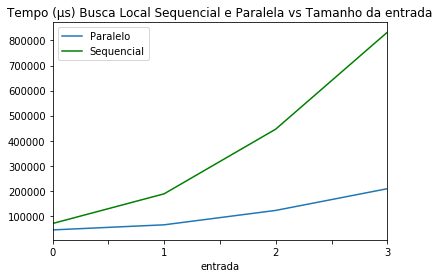

In [21]:
ax = plt.gca()
df.plot(kind='line',x='entrada',y='Paralelo',ax=ax)
df.plot(kind='line',x='entrada',y='Sequencial', color='green', ax=ax)
plt.title(u"Tempo (µs) Busca Local Sequencial e Paralela vs Tamanho da entrada")
plt.show()

### Conclusões Busca Local 
Como o gráfico acima mostra bem, existe uma diferença notável nos tempos de execução e aponta que essa diferença tende a aumentar conforme o tamanho da entrada. Ela ocorre pois como são necessárias várias iterações para saber qual é a real melhor satisfação, uma vez que o vetor inicial é aleatório, se cada iteração for feita em uma thread, o tempo de execução será muito menor.

### Branch and Bound Sequencial e Paralelo


In [26]:
with open('./output/saida1lb.txt', 'r') as f:
    lines = f.read().splitlines()
    s0c = lines[-1]
with open('./output/saida0lb.txt', 'r') as f:
    lines = f.read().splitlines()
    s1c = lines[-1]
with open('./output/saida2lb.txt', 'r') as f:
    lines = f.read().splitlines()
    s2c = lines[-1]
with open('./output/saida3lb.txt', 'r') as f:
    lines = f.read().splitlines()
    s3c = lines[-1]

with open('./output/saida1lpb.txt', 'r') as f:
    lines = f.read().splitlines()
    s0p = lines[-1]
with open('./output/saida0lpb.txt', 'r') as f:
    lines = f.read().splitlines()
    s1p = lines[-1]
with open('./output/saida2lpb.txt', 'r') as f:
    lines = f.read().splitlines()
    s2p = lines[-1]
with open('./output/saida3lpb.txt', 'r') as f:
    lines = f.read().splitlines()
    s3p = lines[-1]
    
lcb = [s0c,s1c,s2c,s3c]
lpb = [s0p,s1p,s2p,s3p]
entrada = ["0","1","2","3"]

df = pd.DataFrame(list(zip(lce, lpb,entrada)), 
               columns =['Sequencial', 'Paralelo', 'entrada'])
df["Paralelo"] = pd.to_numeric(df["Paralelo"])
df["Sequencial"] = pd.to_numeric(df["Sequencial"])
df

,Sequencial,Paralelo,entrada
0,26,784,0
1,162,9729,1
2,28008,5262,2
3,12454394,871406,3


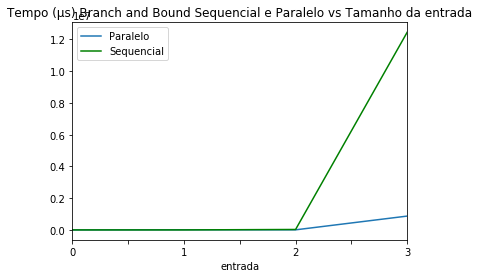

In [27]:
ax = plt.gca()
df.plot(kind='line',x='entrada',y='Paralelo',ax=ax)
df.plot(kind='line',x='entrada',y='Sequencial', color='green', ax=ax)
plt.title(u"Tempo (µs) Branch and Bound Sequencial e Paralelo vs Tamanho da entrada")
plt.show()

### Conclusões: Branch and Bound Sequencial e Paralelo
Com era de se esperar, a Branch and Bound tem um desempnho muito similar com a busca exaustiva, contudo, como o programa verifica se existe a possibilidade da satisfação de um certo vetor ficar melhor que a melhor global, o número de recursões é menor uma vez que caso não exista a possíbilidade de melhora, o programa não gasta tempo calculando uma coisa que não vai ser utilizada.

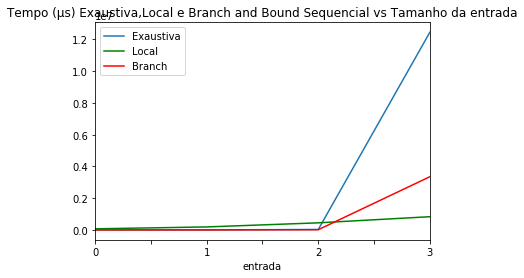

In [35]:
dfs = pd.DataFrame(list(zip(lce,lcl, lcb,entrada)), 
               columns =['Exaustiva','Local', 'Branch', 'entrada'])

dfs["Exaustiva"] = pd.to_numeric(dfs["Exaustiva"])
dfs["Local"] = pd.to_numeric(dfs["Local"])
dfs["Branch"] = pd.to_numeric(dfs["Branch"])

dfp = pd.DataFrame(list(zip(lpe,lpl, lpb,entrada)), 
               columns =['Exaustiva','Local', 'Branch', 'entrada'])
dfp["Exaustiva"] = pd.to_numeric(dfs["Exaustiva"])
dfp["Local"] = pd.to_numeric(dfs["Local"])
dfp["Branch"] = pd.to_numeric(dfs["Branch"])

ax = plt.gca()
dfs.plot(kind='line',x='entrada',y='Exaustiva',ax=ax)
dfs.plot(kind='line',x='entrada',y='Local', color='green', ax=ax)
dfs.plot(kind='line',x='entrada',y='Branch', color='red', ax=ax)

plt.title(u"Tempo (µs) Exaustiva,Local e Branch and Bound Sequencial vs Tamanho da entrada")
plt.show()

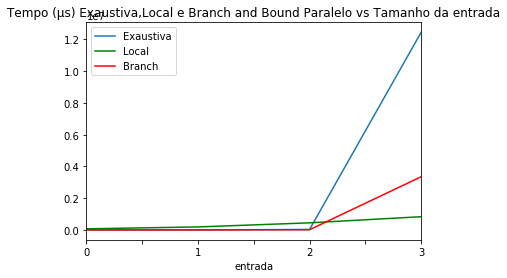

In [37]:
ax = plt.gca()
dfp.plot(kind='line',x='entrada',y='Exaustiva',ax=ax)
dfp.plot(kind='line',x='entrada',y='Local', color='green', ax=ax)
dfp.plot(kind='line',x='entrada',y='Branch', color='red', ax=ax)

plt.title(u"Tempo (µs) Exaustiva,Local e Branch and Bound Paralelo vs Tamanho da entrada")
plt.show()

### Comparação entre as estratégias
Como é possível perceber pelos gráficos acima, em ambas as implementações sequenciais e paralelas, a busca exaustiva é a mais lenta, e seu desempenho piora quanto maior for o tamanho da entrada. O branch and bound é melhor que a exaustiva, uma fez que as estratégias são muito parecidas mas o bb faz menos iterações desnecessárias. A busca local tem um tempo maior para entradas pequenas, contudo, para entradas muito grandes, seu desempenho é muito melhor que todas as outras.

## Parte 3 GPU
Para aumentar ainda mais o desempenho do programa, podemos fazer o processamento em GPUs pois, como têm um número massivo de threads, com o objetivo de aumentar o throughput, as GPUs podem ser 10X mais rápidas que as CPUs para códigos em paralelo, uma vez que enquanto um CPU muito potente pode ter uma duzia de cores, uma GPU tem centenas. Para fazer essa implementção, será usada a biblioteca Thrust da Nvidia que oferece uma interface flexível e de alto nível para programação de GPU.
Os testes foram feitos em um Dell XPS 15 9570 com 12 threads e uma gtx 1050ti rondando Ubuntu 19.  
O tempo de execução, em microsegundos, das versões em ambas as linguagens é contado para cada uma das entradas, usando a biblioteca chronos.
Foram usados arquivos de entrada com os seguintes parâmetros:

| n_alunos | n_proj | n_escolhas |
|:--------:|:------:|:----------:|
|    12    |    4   |      4     |
|    24    |    8   |      6     |
|    33    |    11  |      5     |


### Busca Local na GPU
   

### Compilando e Executando os programas

In [69]:
try:
    os.system('mkdir build')
    os.system('mkdir output')
except:
    os.system('')

os.system('cmake -B ./build')
os.system('make -C ./build')

os.system('export ITER=100000')

os.system('./build/busca_local_gpu < ./projeto-validacao/entradas/in_local_12_4_4  > ./output/saida0lgpu.txt')
os.system('./build/busca_local_gpu < ./projeto-validacao/entradas/in_heur_24_8_6 > ./output/saida1lgpu.txt')
os.system('./build/busca_local_gpu < ./projeto-validacao/entradas/in_heur_33_11_5 > ./output/saida2lgpu.txt')

os.system('./build/busca_local_par < ./entrada3 > ./output/saida0lpp.txt')
os.system('./build/busca_local_par < ./projeto-validacao/entradas/in_heur_24_8_6 > ./output/saida1lpp.txt')
os.system('./build/busca_local_par < ./projeto-validacao/entradas/in_heur_33_11_5 > ./output/saida2lpp.txt')

0

In [70]:
with open('./output/saida0lgpu.txt', 'r') as f:
    lines = f.read().splitlines()
    s0c = lines[-1]
with open('./output/saida1lgpu.txt', 'r') as f:
    lines = f.read().splitlines()
    s1c = lines[-1]
with open('./output/saida2lgpu.txt', 'r') as f:
    lines = f.read().splitlines()
    s2c = lines[-1]
    
with open('./output/saida1lpp.txt', 'r') as f:
    lines = f.read().splitlines()
    s0p = lines[-1]
with open('./output/saida0lpp.txt', 'r') as f:
    lines = f.read().splitlines()
    s1p = lines[-1]
with open('./output/saida2lpp.txt', 'r') as f:
    lines = f.read().splitlines()
    s2p = lines[-1]

    
lg = [s0c,s1c,s2c]
lpb = [s0p,s1p,s2p,s3p]
entrada = ["0","1","2"]

df = pd.DataFrame(list(zip(lg,lpb,entrada)), 
               columns =['GPU',"Local", 'entrada'])
df["GPU"] = pd.to_numeric(df["GPU"])
df["Local"] = pd.to_numeric(df["Local"])

df

,GPU,Local,entrada
0,645464,671576,0
1,659150,196735,1
2,701628,1361563,2


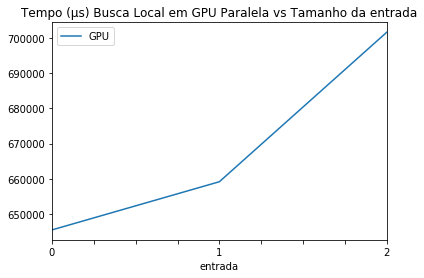

In [71]:
ax = plt.gca()
df.plot(kind='line',x='entrada',y='GPU',ax=ax)
plt.title(u"Tempo (µs) Busca Local em GPU Paralela vs Tamanho da entrada")
plt.show()

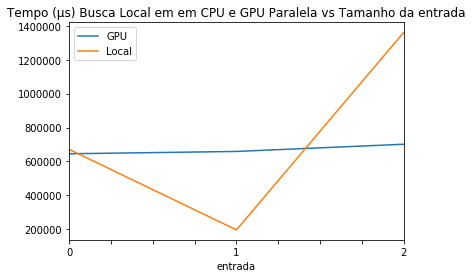

In [72]:
ax = plt.gca()
df.plot(kind='line',x='entrada',y='GPU',ax=ax)
df.plot(kind='line',x='entrada',y='Local',ax=ax)

plt.title(u"Tempo (µs) Busca Local em em CPU e GPU Paralela vs Tamanho da entrada")
plt.show()

### Conclusões Busca Local na GPU
A busca local em GPUs tem um desempenho muito melhor que a feita em CPUs, especialmente para entradas muito grandes, isso acontece devido ao tipo de arquitetura de cada um dos componentes, como as GPUs têm muitos cores, elas podem fazer muito mais tarefas em paralelo que CPUs, assim além de terem um desempenho melhor, os tempos são mais consistentes conforme o tamanho da entrada aumenta.

## Conclusão
Como foi possível observar nos testes realizados, a paralelização e o uso de GPUs para processamento podem reduzir drasticamente o tempo de execução de um problema, contudo, além da potência e do tipo do hardware, também é importante ressaltar a importância de empregar boas estratégias de resolução do problema, uma vez que simplesmente usar hardwares mais potentes para melhorar os resultados, além de muito custoso economicamente, a escalabilidade não é sempre uma relação linear entre poder de processamento e tempo de execução. Além disso, nem todos os problemas ou formas de resolução podem ser paralelizados ou aplicados em GPUs para aumentar seu desempenho.
